In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
plt.rc("figure", figsize=(14,6))

In [4]:
poll =  pd.read_csv('city_day.csv')

In [5]:
poll


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [72]:
pollSt = poll[['Date', 'PM2.5', 'PM10', 'NO', 'NO2','AQI']]
pollSt = pollSt.dropna(axis='rows') 
pollSt = pollSt[:800]

In [73]:
pollSt

,Date,PM2.5,PM10,NO,NO2,AQI
1595,15-05-2019,37.55,122.41,15.08,85.12,281.0
1596,16-05-2019,33.97,116.32,14.67,79.71,330.0
1597,17-05-2019,35.48,130.07,18.02,77.61,356.0
1598,18-05-2019,34.11,138.31,13.27,75.23,359.0
1599,19-05-2019,33.69,111.73,34.56,68.90,547.0
...,...,...,...,...,...,...
2446,14-10-2018,39.22,102.60,4.90,24.58,113.0
2447,15-10-2018,36.86,76.61,8.26,27.36,91.0
2448,16-10-2018,34.41,72.03,10.35,25.38,77.0
2449,17-10-2018,22.05,48.93,6.04,18.92,80.0


In [74]:
datelist = pd.date_range('2019-02-01', periods=800).tolist()

In [75]:
pollSt['new'] = datelist

In [76]:
pollSt['new']  = pd.to_datetime(pollSt['new'])
pollSt.set_index('new',inplace=True)

In [77]:
pollSt.drop('Date',axis=1,inplace=True)

In [78]:
exogs = pollSt.drop('AQI',axis=1)
endog = pollSt['AQI']

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [80]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [81]:
adf_test(endog)

Results of Dickey-Fuller Test:
Test Statistic                  -2.025302
p-value                          0.275591
#Lags Used                      18.000000
Number of Observations Used    781.000000
Critical Value (1%)             -3.438751
Critical Value (5%)             -2.865248
Critical Value (10%)            -2.568744
dtype: float64


In [82]:
kpss_test(endog)

Results of KPSS Test:
Test Statistic            3.049612
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [83]:
endog_new = endog - endog.shift(1)
endog_new.fillna(0, inplace=True)

In [17]:
adf_test(endog_new)

Results of Dickey-Fuller Test:
Test Statistic                -1.104241e+01
p-value                        5.325070e-20
#Lags Used                     1.700000e+01
Number of Observations Used    7.820000e+02
Critical Value (1%)           -3.438740e+00
Critical Value (5%)           -2.865243e+00
Critical Value (10%)          -2.568742e+00
dtype: float64


In [18]:
kpss_test(endog_new)

Results of KPSS Test:
Test Statistic            0.044693
p-value                   0.100000
Lags Used                44.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [19]:
endog

new
2019-02-01    281.0
2019-02-02    330.0
2019-02-03    356.0
2019-02-04    359.0
2019-02-05    547.0
              ...  
2021-04-06    113.0
2021-04-07     91.0
2021-04-08     77.0
2021-04-09     80.0
2021-04-10    149.0
Name: AQI, Length: 800, dtype: float64

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=endog[:-30],
                exog=exogs[:-30],
                order=(4, 1, 2),
                seasonal_order=(2, 1, 1, 7),
                measurement_error=True,
                time_varying_regression=True,
                mle_regression=False)
model = model.fit()

c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

In [21]:
forecasts = model.forecast(steps=30, exog = exogs[-30:])

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
print('The mean value for AQI (forecast period) data is: ', endog[-30:].mean())

The mean value for AQI (forecast period) data is:  85.93333333333334


In [24]:
print('The mean value for AQI (forecast) is: ', forecasts.mean())

The mean value for AQI (forecast) is:  101.09648638102922


In [25]:
print('The Mean Absolute Percentage error is: ',mean_absolute_percentage_error(endog[-30:], forecasts))

The Mean Absolute Percentage error is:  29.604058593446986


In [26]:
forecasts.index = endog[-30:].index

<AxesSubplot:xlabel='new'>

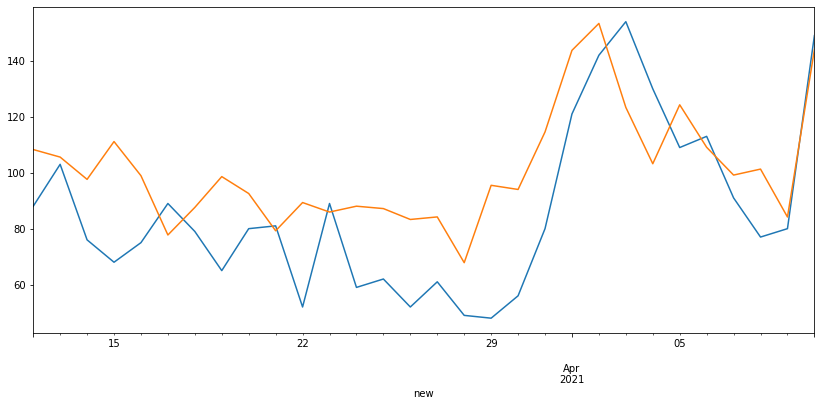

In [27]:
endog[-30:].plot()
forecasts.plot()

In [28]:
error = round(abs(endog[-30:].sum() - forecasts.sum())/endog[-30:].sum()*100,2)
print(f"Error in 30 days AQI Prediction: {error}%")

Error in 30 days AQI Prediction: 17.65%


In [29]:
pm_2 = pollSt['PM2.5']
pm_10 = pollSt['PM10']
no = pollSt['NO']
no2 = pollSt['NO2']

In [65]:
model_pm2 = SARIMAX(endog=pm_2[:-30],
                order=(4, 1, 1),
                seasonal_order=(1, 1, 1, 5),
                measurement_error=True,
                time_varying_regression=True,
                mle_regression=False)
model_pm2 = model_pm2.fit()

c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
model_pm2 = SARIMAX(endog=pm_2[:-30],
                order=(4, 1, 1),
                seasonal_order=(1, 1, 1, 5),
                measurement_error=True,
                time_varying_regression=True,
                mle_regression=False)
model_pm2 = model_pm2.fit()

c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

In [55]:
model_no = SARIMAX(endog=no[:-30],
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 5),
                measurement_error=True,
                time_varying_regression=True,
                mle_regression=False)
model_no = model_no.fit()

c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
model_no2 = SARIMAX(endog=no2[:-30],
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 5),
                measurement_error=True,
                time_varying_regression=True,
                mle_regression=False)
model_no2 = model_no2.fit()

c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\win\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
forecasts_pm2 = model_pm2.forecast(steps=90)
forecasts_pm10 = model_pm10.forecast(steps=90)
forecasts_no = model_no.forecast(steps=90)
forecasts_no2 = model_no2.forecast(steps=90)

In [67]:
error = round(abs(pm_2[-30:].sum() - forecasts_pm2[:30].sum())/pm_2[-30:].sum()*100,2)
print(f"Error in 30 days AQI Prediction: {error}%")

Error in 30 days AQI Prediction: 24.24%


In [44]:
error = round(abs(pm_10[-30:].sum() - forecasts_pm10[:30].sum())/pm_10[-30:].sum()*100,2)
print(f"Error in 30 days AQI Prediction: {error}%")

Error in 30 days AQI Prediction: 6.65%


In [45]:
error = round(abs(no[-30:].sum() - forecasts_no[:30].sum())/no[-30:].sum()*100,2)
print(f"Error in 30 days AQI Prediction: {error}%")

Error in 30 days AQI Prediction: 11.48%


In [46]:
error = round(abs(no2[-30:].sum() - forecasts_no2[:30].sum())/no2[-30:].sum()*100,2)
print(f"Error in 30 days AQI Prediction: {error}%")

Error in 30 days AQI Prediction: 19.95%


In [35]:
future_data = pd.DataFrame()

In [36]:
future_data['PM2.5'] = forecasts_pm2
future_data['PM10'] = forecasts_pm10
future_data['NO'] = forecasts_no
future_data['NO2'] = forecasts_no2

In [84]:
Inew_AQ = model.forecast(steps=90, exog = future_data)

In [85]:
future_data["new_AQI"] = new_AQI

In [86]:
# Final output
future_data

,PM2.5,PM10,NO,NO2,new_AQI
2021-03-12,25.763756,82.489917,9.981975,21.927034,102.386895
2021-03-13,25.635404,77.440688,8.866665,20.999491,95.616218
2021-03-14,25.582390,76.845649,8.310819,18.972312,90.904930
2021-03-15,25.174568,76.945233,6.659355,19.387053,103.634148
2021-03-16,25.554448,76.017724,6.199626,20.542715,97.686869
...,...,...,...,...,...
2021-06-05,24.173700,68.727790,5.216653,12.561156,88.159396
2021-06-06,24.204383,68.545159,5.496616,13.005593,86.153552
2021-06-07,24.274895,68.834923,5.828112,10.466863,101.371288
2021-06-08,23.929877,68.768272,4.892419,11.086046,94.398539
